# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/data/LinearRegressionData.csv')

In [ ]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [ ]:
X = dataset.iloc[:, :-1].values # 독립 변수
y = dataset.iloc[:, -1].values # 종속 변수

X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습(모델 생성)

LinearRegression()

In [ ]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

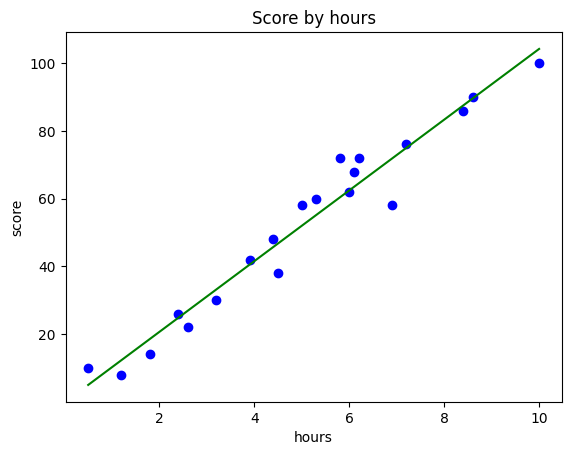

In [ ]:
plt.scatter(X, y, color = 'b')
plt.plot(X, y_pred, color = 'g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9]])) # [[9], [8], [7]]

9시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [ ]:
reg.coef_ # 기울기

array([10.44369694])

In [ ]:
reg.intercept_ # 절편

-0.218484702867201

In [ ]:
# 10.4436 * x - 0.2184

In [ ]:
# 가지고 있는 데이터를 이용해서 모델을 평가하기 위해서 데이터 세트 분리를 함(훈련세트, 테스트세트) 80 : 20 정도

# 데이터 세트 분리

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/LinearRegressionData.csv')

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20%의 테스트 세트

In [ ]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [ ]:
X_train, len(X_train)

(array([[ 0.5],
        [ 4.4],
        [ 2.4],
        [ 5.8],
        [ 6. ],
        [ 2.6],
        [10. ],
        [ 3.9],
        [ 6.2],
        [ 6.9],
        [ 1.2],
        [ 3.2],
        [ 6.1],
        [ 4.5],
        [ 1.8],
        [ 5. ]]),
 16)

In [ ]:
X_test, len(X_test)

(array([[7.2],
        [5.3],
        [8.6],
        [8.4]]),
 4)

In [ ]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [ ]:
y_train, len(y_train)

(array([ 10,  48,  26,  72,  62,  22, 100,  42,  72,  58,   8,  30,  68,
         38,  14,  58]),
 16)

In [ ]:
y_test, len(y_test)

(array([76, 60, 90, 86]), 4)

### 분리된 데이터를 통한 모델링

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

### 데이터 시각화 (훈련세트)

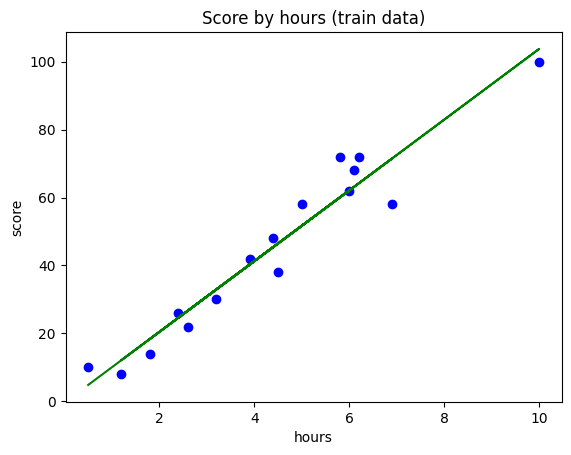

In [ ]:
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, reg.predict(X_train), color = 'g')
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (테스트세트)

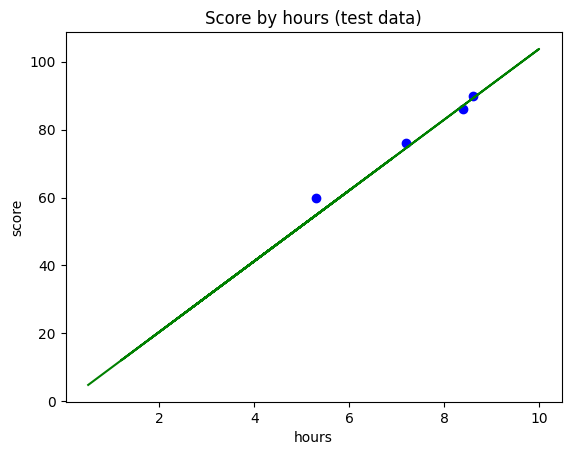

In [ ]:
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_train, reg.predict(X_train), color = 'g')
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
reg.coef_

array([10.41167993])

In [ ]:
reg.intercept_

-0.37646469077008504

### 모델 평가

In [ ]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.94244937327793

In [ ]:
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9382256697268045

# 경사 하강법 (Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=1000, eta0=0.0001, verbose=0) # max_iter : Epoch(데이터 전부 쓰는 것 횟수), eta0 : Learning Rate(학습률), 0.001 : 1e-3 => 10의 -3승
sr.fit(X_train, y_train)

SGDRegressor(eta0=0.0001)

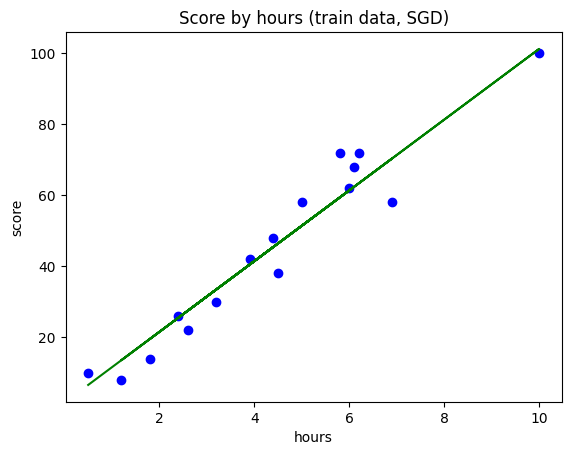

In [ ]:
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, sr.predict(X_train), color = 'g')
plt.title('Score by hours (train data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
sr.coef_

array([9.94634792])

In [ ]:
sr.intercept_

array([1.68160104])

In [ ]:
sr.score(X_test, y_test)

0.9483810747318226

In [ ]:
sr.score(X_train, y_train)

0.9366713261518841